Sesión 2
Cargue y Exploración

Por Angela Cristina Villate


**prepración del entorno**

In [4]:
!pip install python-docx # Install the missing 'python-docx' library. Note it is NOT called 'docx'.
!pip install PyPDF2 # Install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.6 MB/s eta 0:00:00


**Se invocan las librerías**

In [66]:
import os  # Manejo de archivos y carpetas
import PyPDF2  # Lectura de archivos PDF
import docx  # Lectura de archivos Word
import nltk  # Procesamiento de texto natural
from collections import Counter  # Contar ocurrencias de palabras
import matplotlib.pyplot as plt  # Generar gráficos
import pandas as pd

In [12]:
# Descargar recursos necesarios para tokenización y stopwords en español
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Cargue de documentos en word**

In [14]:
# 1. Cargar un documento Word y mostrar contenido
texto_word = cargar_word("/content/C-230-16.docx")  # Ruta en Colab
print(texto_word)  # Muestra el texto extraído del Word

Sentencia C-230/16


REFORMA DE EQUILIBRIO DE PODERES Y REAJUSTE INSTITUCIONAL-Mecanismos autorizados para reformar la prohibición de reelección presidencial

DEMANDA DE INCONSTITUCIONALIDAD POR VICIOS DE FORMA-Caducidad 

DEMANDA DE INCONSTITUCIONALIDAD CONTRA ACTOS LEGISLATIVOS-Cargos por vicios de procedimiento en su formación/DEMANDA DE INCONSTITUCIONALIDAD DE ACTO REFORMATORIO DE LA CONSTITUCION-Cargos por vicios de procedimiento en su formación

DEMANDA DE INCONSTITUCIONALIDAD POR VICIOS DE COMPETENCIA-Requisitos mínimos

DEMANDA DE INCONSTITUCIONALIDAD-Objeto y concepto de la violación

DEMANDA DE INCONSTITUCIONALIDAD-Razones claras, ciertas, específicas, pertinentes y suficientes

DEMANDA DE INCONSTITUCIONALIDAD DE ACTO LEGISLATIVO POR DESBORDAMIENTO DE LA COMPETENCIA DEL CONSTITUYENTE DERIVADO-Cumplimiento de requisitos

ACCION PUBLICA DE INCONSTITUCIONALIDAD-Cualificación/DEMANDA DE INCONSTITUCIONALIDAD CONTRA ACTOS REFORMATORIOS POR SUSTITUCION DE LA CONSTITUCION-Cumplimient

**Cargue de documentos en PDF**

In [16]:
# 2. Cargar un documento PDF y mostrar contenido

# Ruta del archivo PDF
ruta_pdf = "/content/CORREGIDA  22-300219 CONFIRMA - APELACION CRISTAL SAS VU.pdf"

# Abrir el PDF en modo lectura binaria
archivo = open(ruta_pdf, "rb")

# Crear un lector de PDF
lector = PyPDF2.PdfReader(archivo)

# Extraer texto de todas las páginas
texto = ""
for pagina in lector.pages:
    texto += pagina.extract_text() + "\n"

# Cerrar el archivo
archivo.close()

# Mostrar el texto extraído
print(texto)

 
MINISTERIO DE COMERCIO, INDUSTRIA Y TURISMO  
 SUPERINTENDENCIA DE INDUSTRIA Y COMERCIO   
 
 
RESOLUCIÓN NÚMERO _ 43866 _ DE 20 23 
(Julio 31 de 2023 ) 
 
Por la cual se resuelve un recur so de apelación  
 
 
Radicación: 22 -300219                                                                          
 
 
LA SUPERINTENDENTE  DELEGAD A PARA  LA PROTECCIÓN  DE DATOS  PERSONALES  
 
En ejercicio de sus facultades legales, en especial las conferidas por los artículos 19 y 21 de la Ley 
1581 de 2012 y el numeral 8 del artícu lo 16 del D ecreto 4886 de 2011 (modificado por el Decreto 092 
de 2022), y  
 
CONSIDERANDO:  
 
PRIMERO.  Que m ediante Resolución No. 58054  del 29 de agosto  de 2022 , la Dirección de 
Investigación de Protección de Datos Personales ordenó a la sociedad CRISTAL 2010  SAS, lo 
siguiente:  
 
“ARTÍCULO PRIMERO: ORDENAR a la sociedad CRISTAL 2010 SAS que documente, implemente y monitoree 
una política de seguridad de la información que contenga medidas técnicas,

**Preprocesamiento de textos: pasar a minúsculas, tokenizar y eliminar stop words**

In [19]:
import nltk

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [20]:
# Preprocesamiento del texto extraído del PDF
texto_pdf = texto  # Asigna el texto extraído a texto_pdf
texto_pdf = texto_pdf.lower()  # Convertir a minúsculas
palabras = nltk.word_tokenize(texto_pdf, language='spanish')  # Tokenización
palabras = [p for p in palabras if p.isalnum()]  # Filtrar palabras alfanuméricas

In [22]:
palabras;

In [23]:
# Eliminar stopwords en español
stop_words = set(stopwords.words('spanish'))
palabras_limpias = [p for p in palabras if p not in stop_words]

In [25]:
palabras_limpias;

**Conteo de palabras**

In [26]:
# Contar palabras más frecuentes
conteo = Counter(palabras_limpias)
palabras_comunes = conteo.most_common(20)  # Top 20 palabras

In [27]:
palabras_comunes

[('datos', 27),
 ('resolución', 14),
 ('personales', 14),
 ('sociedad', 13),
 ('seguridad', 13),
 ('s', 12),
 ('2022', 11),
 ('información', 11),
 ('medidas', 11),
 ('l', 10),
 ('d', 9),
 ('artículo', 9),
 ('bases', 9),
 ('protección', 8),
 ('58054', 8),
 ('recurso', 8),
 ('tratamiento', 8),
 ('29', 7),
 ('agosto', 7),
 ('registro', 7)]

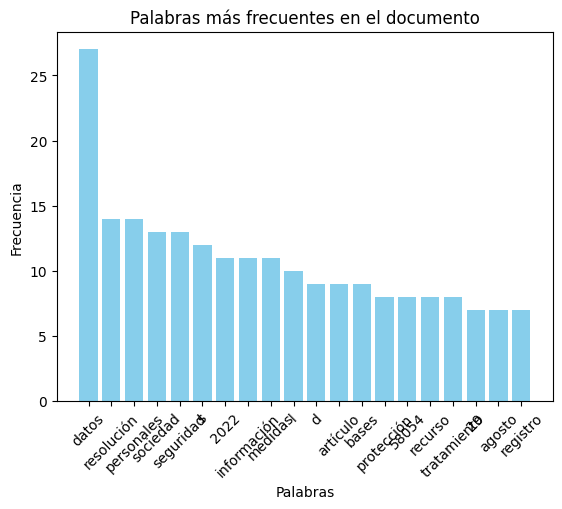

In [28]:
# Visualización
palabras, frecuencias = zip(*palabras_comunes)  # Separar palabras y frecuencias
plt.bar(palabras, frecuencias, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.title("Palabras más frecuentes en el documento")
plt.show()

**Lectura de varios documentos, en carpeta**

In [47]:
!pip install py7zr # Install the py7zr library before attempting to import it.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 13.7 MB/s eta 0:00:00


In [71]:
import os  # Módulo para manejar rutas y archivos
import py7zr  # Librería para extraer archivos .7z
import PyPDF2  # Librería para leer archivos PDF

In [73]:
# Configurar stop words en español
stop_words = set(stopwords.words('spanish'))

In [74]:
# 📂 Ruta del archivo .7z y carpeta destino
ruta_7z = "/content/Docs Sesión 2 - copia.7z"
carpeta_destino = "/content/Docs_Sesion_2"

In [75]:
# 🔹 Extraer archivos del .7z
with py7zr.SevenZipFile(ruta_7z, mode='r') as archivo:
    archivo.extractall(path=carpeta_destino)

print("✅ Archivos extraídos correctamente.")

✅ Archivos extraídos correctamente.


In [76]:
# 📂 Ruta donde están los PDFs extraídos
ruta_pdfs = os.path.join(carpeta_destino, "Docs Sesión 2 - copia")

In [77]:
# 🔹 Verificar si hay PDFs
pdfs = [archivo for archivo in os.listdir(ruta_pdfs) if archivo.endswith(".pdf")]

if not pdfs:
    print("⚠️ No se encontraron archivos PDF en la carpeta extraída.")
else:
    print("✅ PDFs encontrados:")
    for pdf in pdfs:
        print("-", pdf)

✅ PDFs encontrados:
- version corregida 25-07 Resolucion rad 19-78098 - R2 VU.pdf
- CORREGIDA  22-300219 CONFIRMA - APELACION CRISTAL SAS VU.pdf
- CORREGIDA RAD  21-210342 CONFIRMA - ARCHIVO_doc VP.pdf
- RE60011-2024.pdf


In [78]:
# 🔹 Leer y preprocesar texto de todos los PDFs
texto_total = ""

for archivo in pdfs:
    ruta_pdf = os.path.join(ruta_pdfs, archivo)
    with open(ruta_pdf, "rb") as f:
        lector = PyPDF2.PdfReader(f)
        for pagina in lector.pages:
            texto_total += pagina.extract_text() + " "


In [79]:
texto_total

' \n \nMINISTERIO DE COMERCIO, INDUSTRIA Y TURISMO  \n SUPERINTENDENCIA DE INDUSTRIA Y COMERCIO   \n \nRESOLUCIÓN NÚMERO _ 42570 _ DE 20 23 \n \n(Julio 27 de 2023 ) \n \n“Por la cual se resuelve un recurso de apelación ” \n \nRadicación  19-78098  \n \n \nLA SUPERINTENDENTE  DELEGA DA PARA  LA PROTECCIÓN  DE DATOS  PERSONALES  \n \nEn ejercicio de sus facultades legales, en especial las conferidas por los artículos 19 y 21 de la  \nLey 1581 de 2012 y el numeral 8 del artículo 16 del Decreto 4886 de 2011  (modificado por el  \nDecreto 092 de 2022) , y \n \nCONSID ERANDO  \n \nPRIMERO . Que, mediante Resolución No. 51177  del 1 de agosto  de 20 22, la Dirección de \nInvestigación de Protección de Datos Personales , respecto de la actuación adelantada en contra \nde la CLÍNICA DE LA VISIÓN DEL VALLE S.A.S.  resolvió lo  siguiente :  \n \n“ARTÍCULO PRIMERO: IMPONER una sanción pecuniaria a la sociedad CLÍNICA DE LA VISIÓN DEL \nVALLE S.A.S. , identificada con NIT 805.017.914 -1, de VEINTID

In [80]:
# 🔹 Preprocesamiento: minúsculas, tokenización, eliminación de stop words
tokens = word_tokenize(texto_total.lower(), language="spanish")
tokens_limpios = [t for t in tokens if t.isalnum() and t not in stop_words]

In [81]:
# 🔹 Contar frecuencia de palabras
frecuencia = Counter(tokens_limpios)
frecuencia_comunes = frecuencia.most_common(50)

In [82]:
# 📊 Crear DataFrame con las 50 palabras más frecuentes
df_frecuencia = pd.DataFrame(frecuencia_comunes, columns=["Palabra", "Frecuencia"])

In [83]:
# 🔹 Mostrar tabla
print("\n📊 **Tabla de las 50 palabras más frecuentes:**")
print(df_frecuencia)


📊 **Tabla de las 50 palabras más frecuentes:**
             Palabra  Frecuencia
0              datos         187
1           artículo         148
2                ley         117
3         personales         102
4        tratamiento          99
5           sociedad          82
6         resolución          67
7               1581          67
8               2012          63
9                ser          60
10           sanción          59
11           titular          59
12                 l          58
13      autorización          55
14                 n          53
15              debe          53
16       información          52
17            número          50
18                 s          50
19                 c          49
20                 4          46
21    consentimiento          46
22           literal          45
23           derecho          45
24                ón          44
25        protección          43
26                 ó          43
27             parte        

In [84]:
# Opcional: Exportar a CSV
df_frecuencia.to_csv("/content/Frecuencia_palabras.csv", index=False)
print("\n✅ Tabla guardada como 'Frecuencia_palabras.csv'.")


✅ Tabla guardada como 'Frecuencia_palabras.csv'.
